In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import random as rand
import numpy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         shuffle=False, num_workers=2)


0it [00:00, ?it/s]


 19%|█▉        | 32415744/170498071 [00:15<01:20, 1716856.75it/s]


 35%|███▍      | 59564032/170498071 [00:29<00:37, 2993956.13it/s]


 58%|█████▊    | 99426304/170498071 [00:42<00:27, 2594684.29it/s]


 82%|████████▏ | 139157504/170498071 [00:55<00:14, 2120673.92it/s]


100%|█████████▉| 170172416/170498071 [01:08<00:00, 3640304.26it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
batch_size = 100
n_iters = 2000
num_epochs = n_iters / (len(trainset) / batch_size)
num_epochs = int(num_epochs)
 
train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
input_dim = 32*32*3
hidden_dim = 1500
output_dim = 10
 

In [10]:
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation_func):
        super(LogisticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.drop = nn.Dropout(0.2)
        self.activation_func = activation_func
        self.fc2 = nn.Linear(hidden_dim, 200)
        self.fc3 = nn.Linear(200, 10)
      
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.drop(out)
        out = self.activation_func(out)

        out = self.fc2(out)
        out = self.drop(out)
        out = self.activation_func(out)

        out = self.fc3(out)

        return out
 

In [11]:
if torch.cuda.is_available():
    avDev = torch.device("cuda")
else:
    avDev = torch.device("cpu")

print(avDev)

cpu


In [18]:
    def train_model(model, optimizer, num_epochs):
      iter = 0
      loss_values = []
      num_updates = 0
      reg_lambda= 1e-6
      print("Training.....") 
      t0 = time.time()
      for epoch in range(num_epochs):
          running_loss = 0.0
          batch_loss = 0
          for i, (images, labels) in enumerate(train_loader):
              
            
              images = Variable(images.view(-1, 32*32*3)).to(avDev)
              labels = Variable(labels).to(avDev)
              
              # Clear gradients w.r.t. parameters
              optimizer.zero_grad()
              
              # Forward pass to get output/logits
              outputs = model(images)
              l1_reg = None
              for W in model.parameters():
                if l1_reg is None:
                  l1_reg = W.norm(1)
                else:
                  l1_reg = l1_reg + W.norm(1)
              
              loss = criterion(outputs, labels) + l1_reg * reg_lambda
              # loss = criterion(outputs, labels)
              
              # Getting gradients w.r.t. parameters
              loss.backward()
              batch_loss += loss.item()
              
              # Updating parameters
              optimizer.step()
              
              iter += 1
          # print("Epoch:", epoch+1, " Loss:", batch_loss/len(train_loader))
          loss_values.append(batch_loss)

      time_taken.append(time.time() - t0)     
      print("Training ended, time taken:", time.time() - t0)
      plt.plot(range(len(loss_values)),loss_values, label = optim)
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.legend()
      return model

In [19]:
def test_model(model):
  
  correct = 0
  total = 0
  pred_test_results = []
  labels_test_results = []
  num_updates = 0
  # Iterate through test dataset
  for images, labels in test_loader:
      #######################
      #  USE GPU FOR MODEL  #
      #######################
      images = Variable(images.view(-1, 32*32*3)).to(avDev)
      # Forward pass only to get logits/output
      outputs = model(images)
                  
      # Get predictions from the maximum value
                  
      _, predicted = torch.max(outputs.data, 1)
      predicted1 = predicted
      pred_list = predicted1.tolist()
      pred_test_results.extend(pred_list)
      
      labels1 = labels
      labels_list = labels1.tolist()
      labels_test_results.extend(labels_list)
              
      correct += (predicted.cpu() == labels.cpu()).sum().float()
      # Total number of labels
      total += labels.size(0)
                  
      #######################
      #  USE GPU FOR MODEL  #
      #######################
      
      num_updates +=1 

  pred_test_numpy = np.asarray(pred_test_results)

  labels_test_numpy = np.asarray(labels_test_results)
  accuracy = 100 * (correct / total)
  accuracy_list.append(accuracy.item())
  print("Accuracy on total test data: {}%".format(accuracy.item()))
  print("Confusion Matrix\n", confusion_matrix(pred_test_numpy, labels_test_numpy), "\n\n")

Number of epochs:  5
##### Activation Function: ReLU() #####
Optimizer: SGD
Training.....
Training ended, time taken: 197.68422484397888
Accuracy on total test data: 51.70000076293945%
Confusion Matrix
 [[544  48  70  28  40  10   7  25  76  43]
 [ 31 632  15  13  16  10  13  15  68 181]
 [ 63  18 400  75 149  97  78  60  13  23]
 [ 49  39 105 388  75 226 120  71  29  61]
 [ 49   8 138  68 463  78 108 122  22  12]
 [ 18  16  84 192  50 411  45  91  20  22]
 [ 23  24 106 122 107  66 591  34   7  36]
 [ 19  17  47  51  69  50  13 535   6  37]
 [176 100  28  35  26  44  16  24 725 104]
 [ 28  98   7  28   5   8   9  23  34 481]] 


Optimizer: Adam
Training.....
Training ended, time taken: 232.3417956829071
Accuracy on total test data: 54.54999923706055%
Confusion Matrix
 [[608  35  66  23  38  13   4  30 106  33]
 [ 34 615  15  21  10   7  16   7  61 144]
 [ 50   7 351  64 104  57  39  40  16  11]
 [ 23  26 114 420  73 246  90  72  30  45]
 [ 52   7 170  68 516  89 107  87  20  16]
 [ 18 

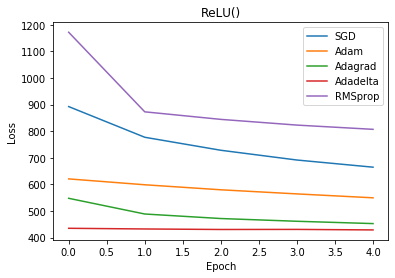

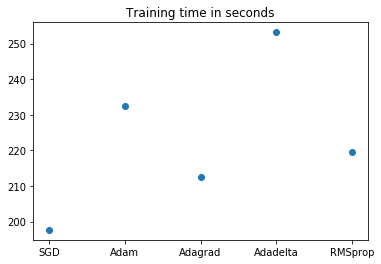

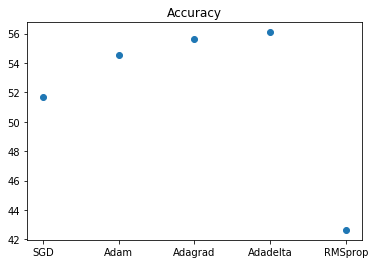

##### Activation Function: Tanh() #####
Optimizer: SGD
Training.....
Training ended, time taken: 186.909494638443
Accuracy on total test data: 45.96999740600586%
Confusion Matrix
 [[494  31 125  46  47  41  14  35  69  34]
 [ 41 521  29  35  16  19  21  26  47 140]
 [ 37  34 312  91 184  86 128  56  15  17]
 [ 29  42 118 357 101 226 135  75  38  36]
 [ 16   9  86  45 315  49  85  61  13   6]
 [ 19  35  69 134  50 324  48  73  31  18]
 [ 25  20  84  98  96  71 476  21   5  26]
 [ 47  26 107  75 132  95  41 539  20  50]
 [213  71  32  44  30  42  13  31 666  80]
 [ 79 211  38  75  29  47  39  83  96 593]] 


Optimizer: Adam
Training.....
Training ended, time taken: 237.24700903892517
Accuracy on total test data: 48.25%
Confusion Matrix
 [[440  28  79  26  34  19   6  28  57  26]
 [ 43 601  46  46  19  22  17  34  55 201]
 [ 62  33 370  95 155  91  78  59  16  17]
 [ 26  22  74 318  56 193  90  62  36  28]
 [ 23  11  93  47 358  62  85  67  19  15]
 [ 26  27  82 180  68 382  58  82  34  2

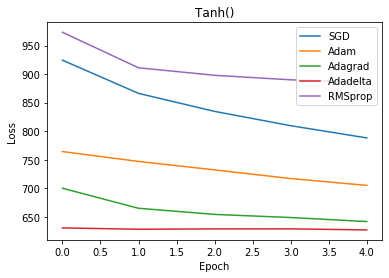

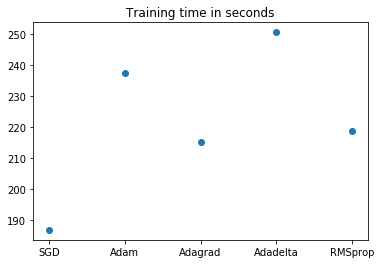

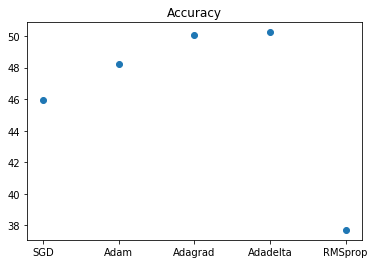

##### Activation Function: Sigmoid() #####
Optimizer: SGD
Training.....
Training ended, time taken: 195.8011610507965
Accuracy on total test data: 34.970001220703125%
Confusion Matrix
 [[523  54 196  81  80  66  26  85 221  71]
 [ 95 572 102 179  85 116 120  84 144 281]
 [ 23  20 143  68 152  93  76  70   7   8]
 [  6   4   5  36   6  27  18  14   2   7]
 [  0   2  39   7  65  15  24  31   0   0]
 [ 17  29  93 279  78 333  97  68  47  14]
 [ 29  48 247 171 326 154 551 103   7  40]
 [ 53  27 120  81 162 101  52 405  15  50]
 [197 111  39  43  24  73   7  40 475 135]
 [ 57 133  16  55  22  22  29 100  82 394]] 


Optimizer: Adam
Training.....
Training ended, time taken: 239.34737300872803
Accuracy on total test data: 41.2400016784668%
Confusion Matrix
 [[443  42  88  19  44  24   5  34 101  50]
 [ 41 487  44  38  19  26  24  31  68 156]
 [ 69   6 163  65  83  67  38  35  20   9]
 [ 29  39  67 211  49 137  69  56  28  26]
 [ 19  16 187  66 300  82 102 100   9  11]
 [ 23  22  67 194  52 31

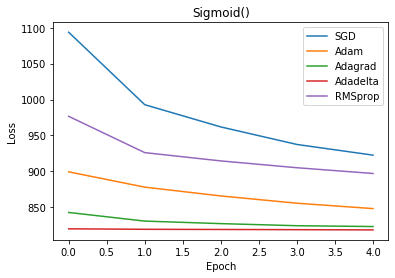

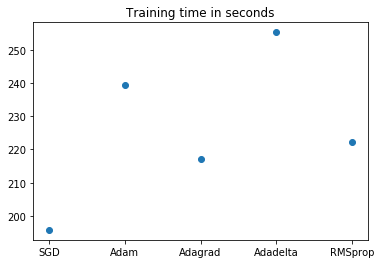

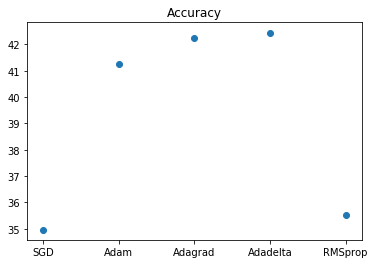

In [20]:
#  USE GPU FOR MODEL  #
#######################
import time

criterion = nn.CrossEntropyLoss().to(avDev)
optimizers = ['SGD', 'Adam', 'Adagrad', 'Adadelta', 'RMSprop']
activation_funcs = [nn.ReLU(), nn.Tanh(), nn.Sigmoid()]
num_epochs = 5
print("Number of epochs: ", num_epochs)


for activation_func in activation_funcs:
  model = LogisticRegressionModel(input_dim,hidden_dim, output_dim, activation_func)
  model.to(avDev)
  print("##### Activation Function:", activation_func, "#####")
  time_taken = []
  accuracy_list = []
  for optim in optimizers:
    if optim == 'SGD':
      optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay = 10e-4)
    elif optim == 'Adam':
      optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay = 10e-4)
    elif optim == 'Adagrad':
      optimizer = torch.optim.Adagrad(model.parameters(), lr=0.001, weight_decay = 10e-4)
    elif optim == 'Adadelta':
      optimizer = torch.optim.Adadelta(model.parameters(), lr=0.001, weight_decay = 10e-4)
    elif optim == 'RMSprop':
      optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay = 10e-4)

    print("Optimizer:", optim)
    
    # Training the model on trainset
    model = train_model(model, optimizer, num_epochs)

    # Testing the model on testset
    test_model(model)

  plt.title(activation_func)
  plt.show()
  plt.scatter(optimizers, time_taken)
  plt.title("Training time in seconds")
  plt.show()
  plt.scatter(optimizers, accuracy_list)
  plt.title("Accuracy")
  plt.show()